In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
df = pd.read_csv("../../data/raw/production_revenue.csv")
df["date"] = pd.to_datetime(df["date"], format="%b-%Y")


In [13]:
display(df.head(3))
print(f"\n🔍 Dimensions: {df.shape}")
print(f"📅 Period: {df['date'].min()} a {df['date'].max()}")

,date,cheese_revenue,milk_revenue,dulce_leche_revenue,eggs_revenue,porks_revenue,vegetables_revenue
0,Jan-2020,300,900,50,12,300,20
1,Feb-2020,375,930,30,24,300,24
2,Mar-2020,420,960,40,60,300,36



🔍 Dimensions: (60, 7)
📅 Period: Apr-2020 a Sep-2024


In [40]:
def make_graphic(data: pd.DataFrame, y: str, title: str) -> None:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data, x = "date", y=y, marker="o")
    plt.xticks(rotation=45)
    plt.title(title)
    plt.grid(True)
    plt.xlabel("Year")
    plt.ylabel("Revenue")

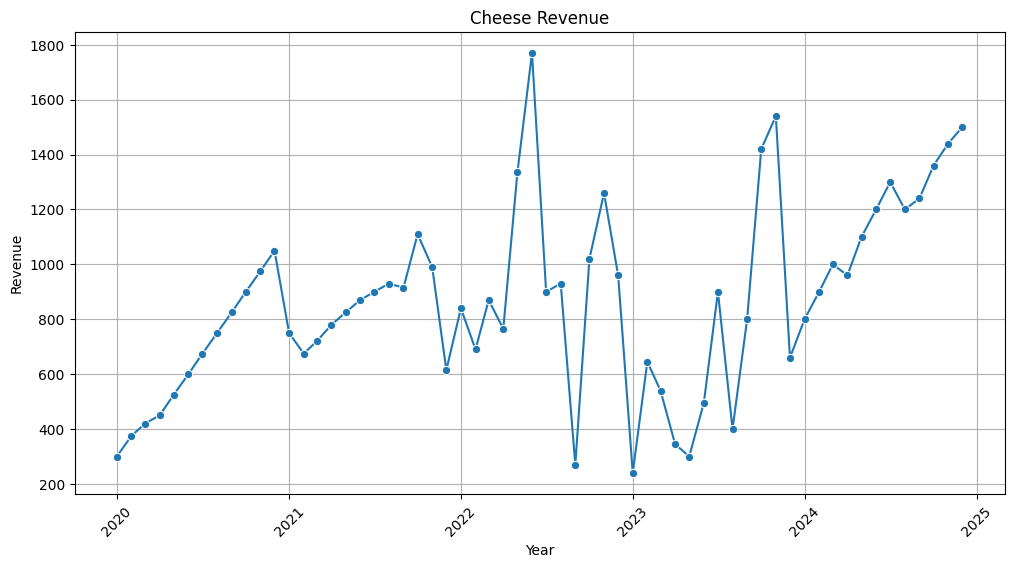

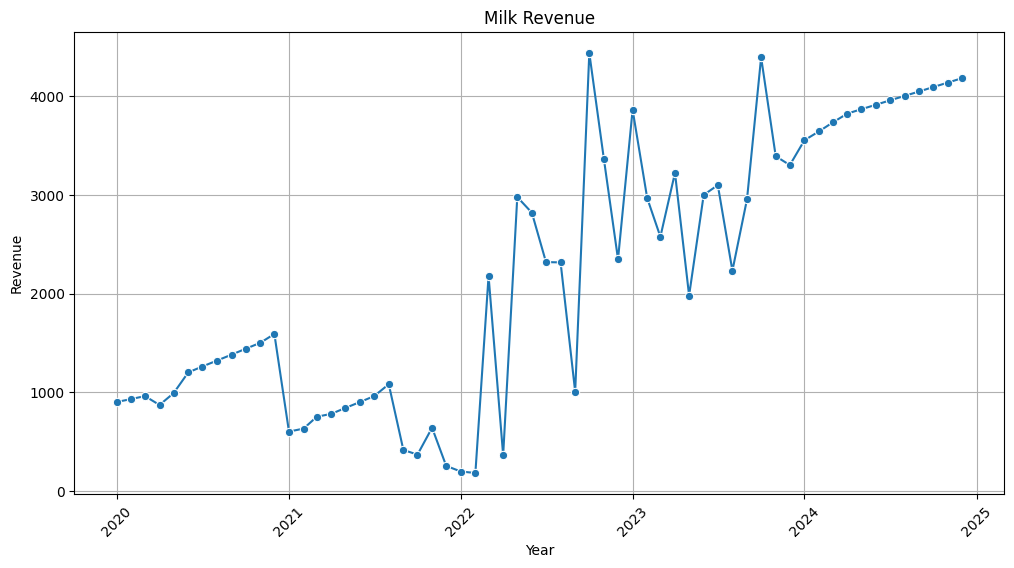

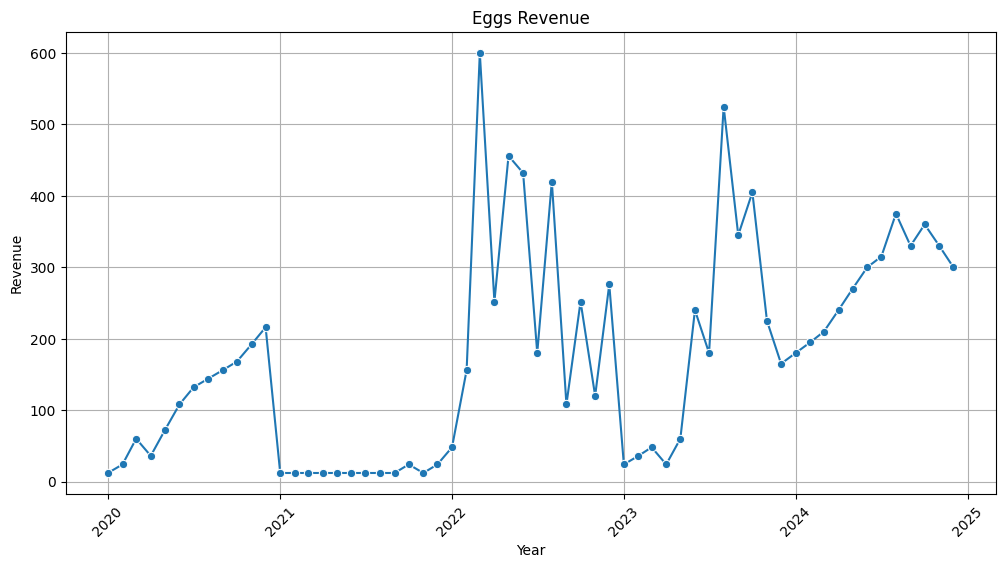

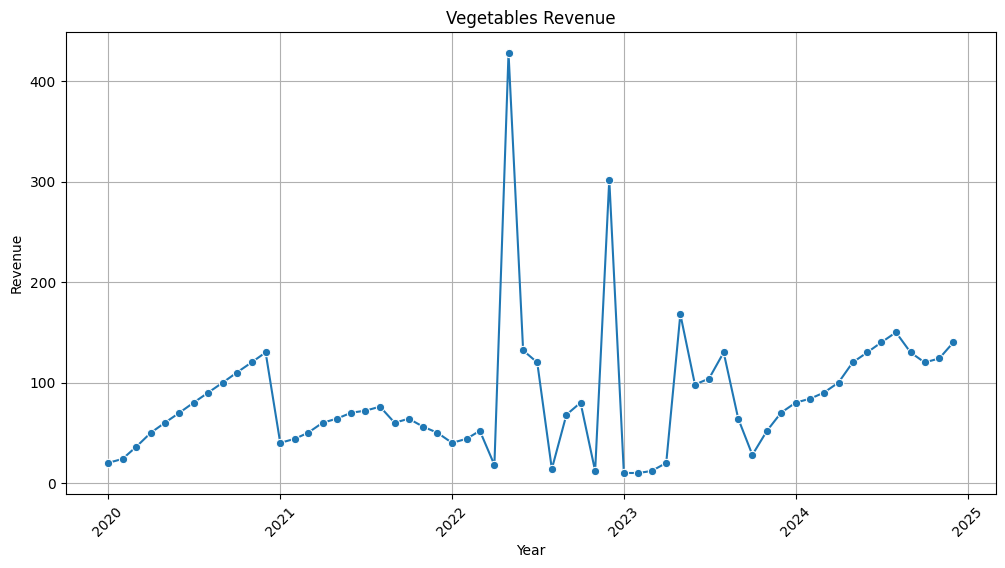

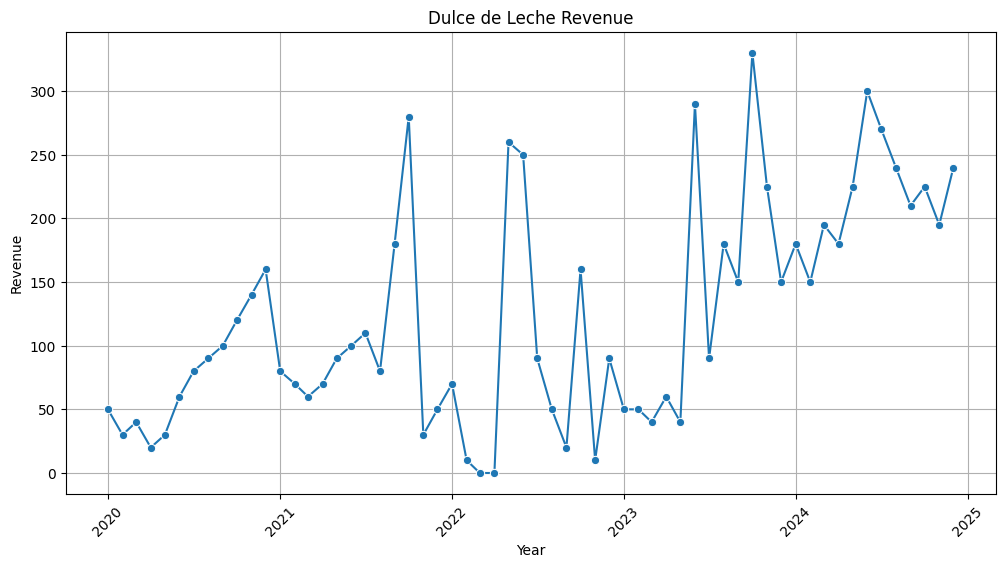

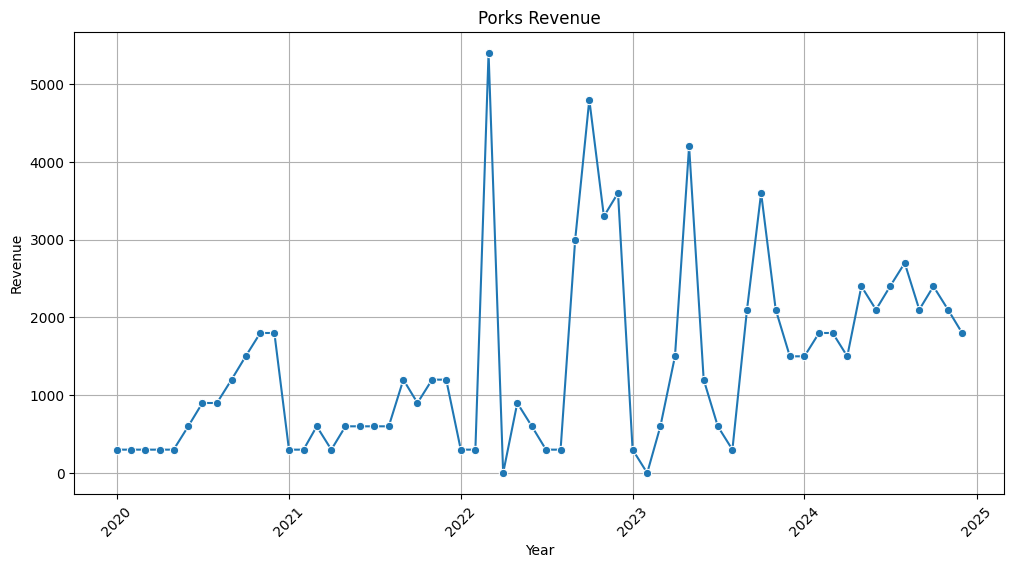

In [41]:
make_graphic(data = df, y = "cheese_revenue", title = "Cheese Revenue")
make_graphic(data = df, y = "milk_revenue", title = "Milk Revenue")
make_graphic(data = df, y = "eggs_revenue", title = "Eggs Revenue")
make_graphic(data = df, y = "vegetables_revenue", title = "Vegetables Revenue")
make_graphic(data = df, y = "dulce_leche_revenue", title = "Dulce de Leche Revenue")
make_graphic(data = df, y = "porks_revenue", title = "Porks Revenue")

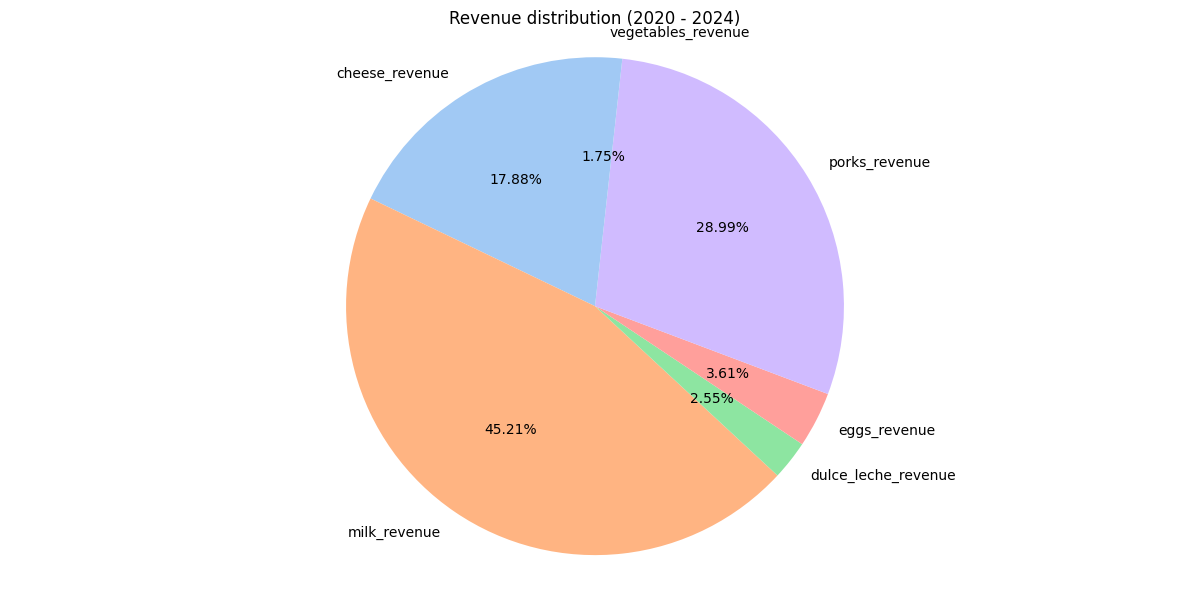

In [39]:
revenue_totals = df.iloc[:, 1:].sum()
labels = revenue_totals.index.tolist()
values = revenue_totals.values.tolist()

colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(12, 6))
plt.pie(
    values,
    labels=labels,
    autopct='%1.2f%%',
    startangle=90,
    colors=colors
)
plt.title("Revenue distribution (2020 - 2024)")
plt.axis("equal")
plt.tight_layout()
plt.show()

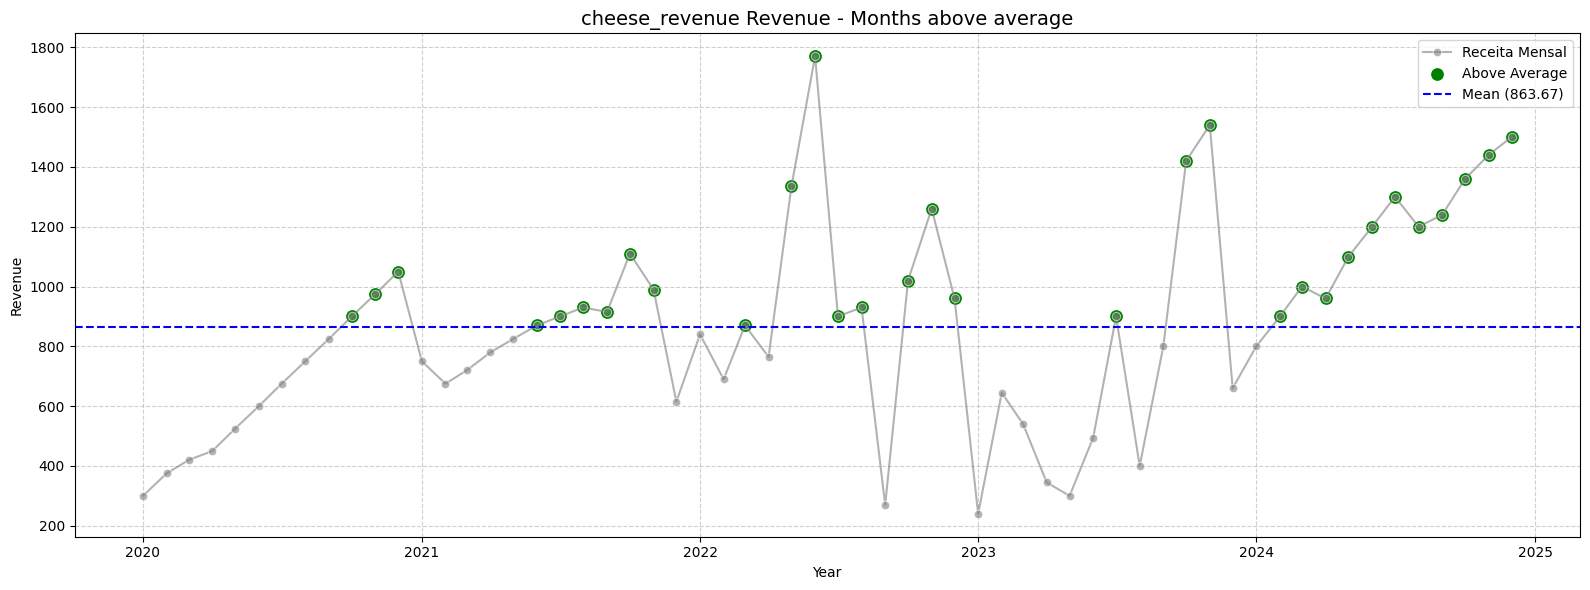

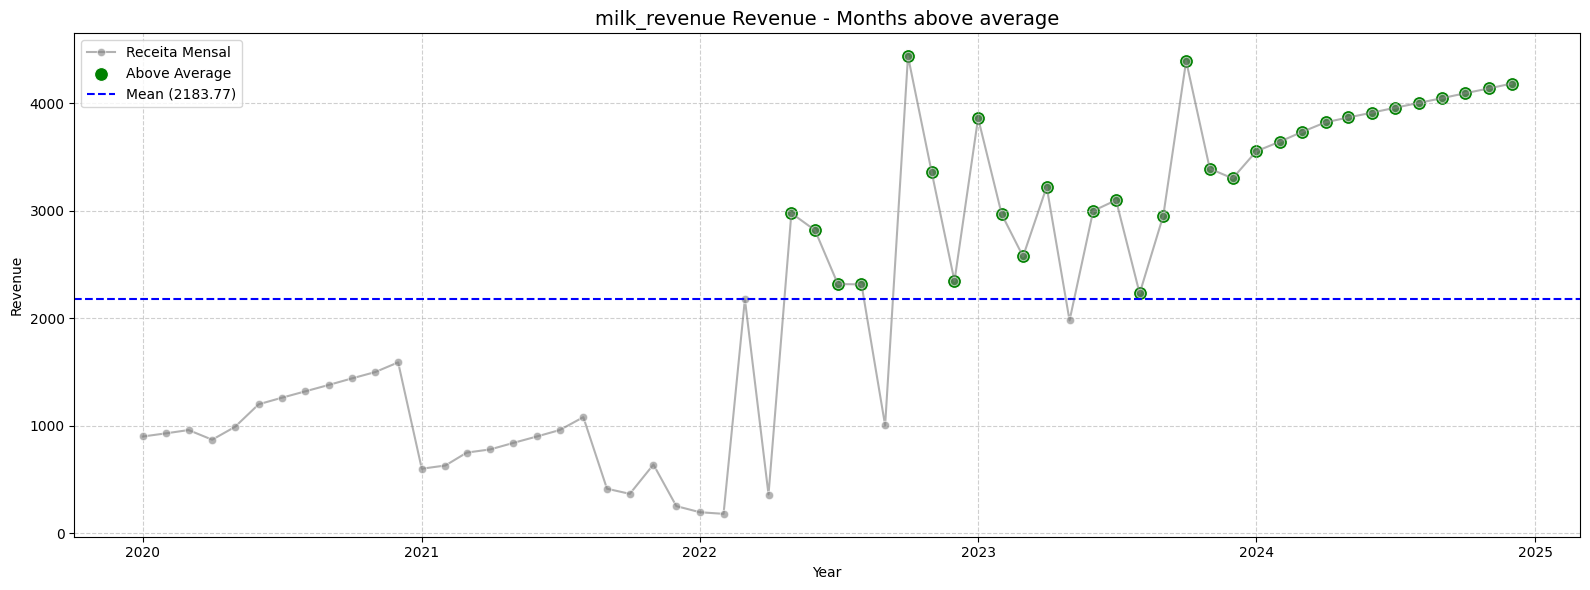

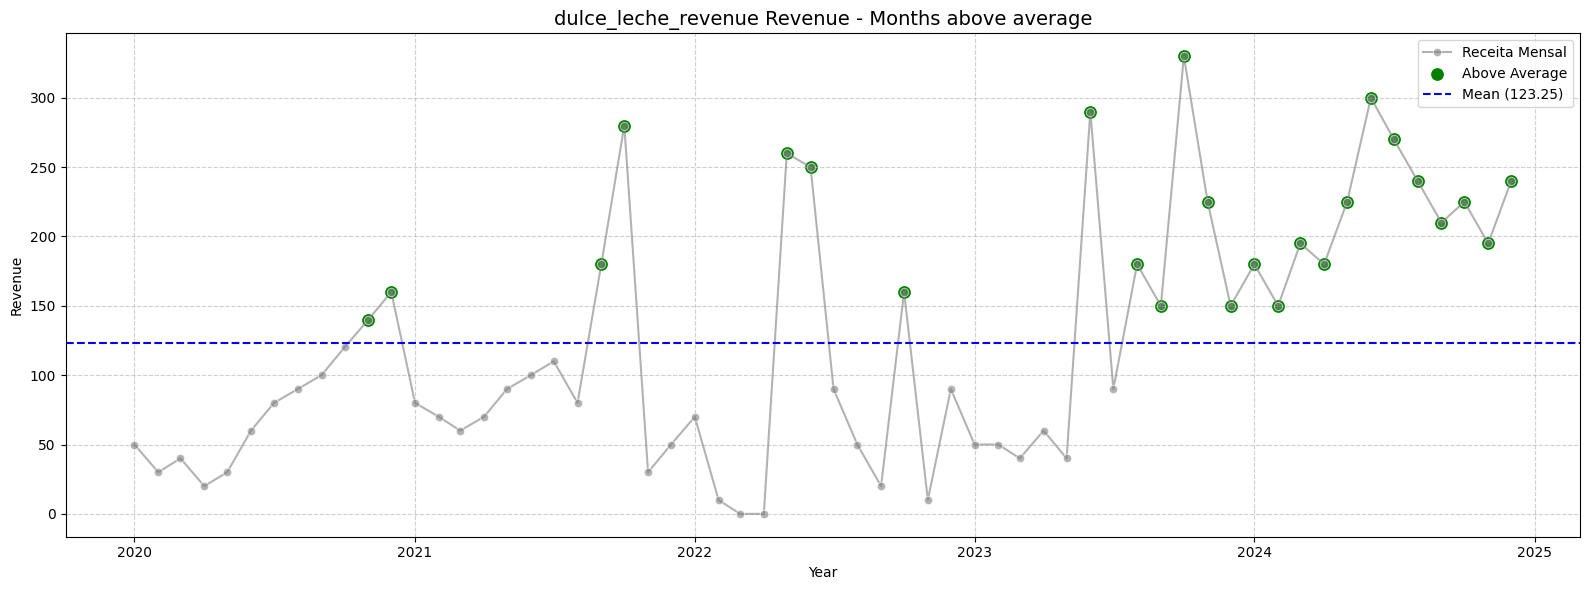

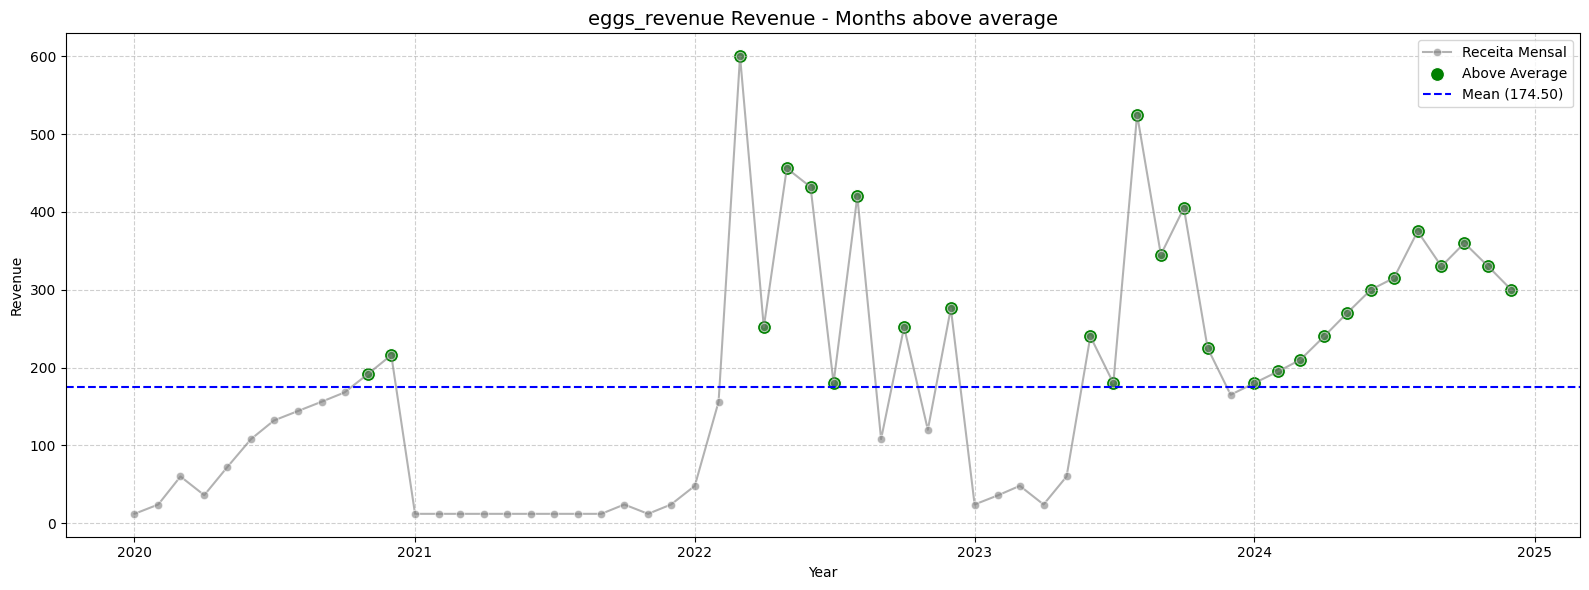

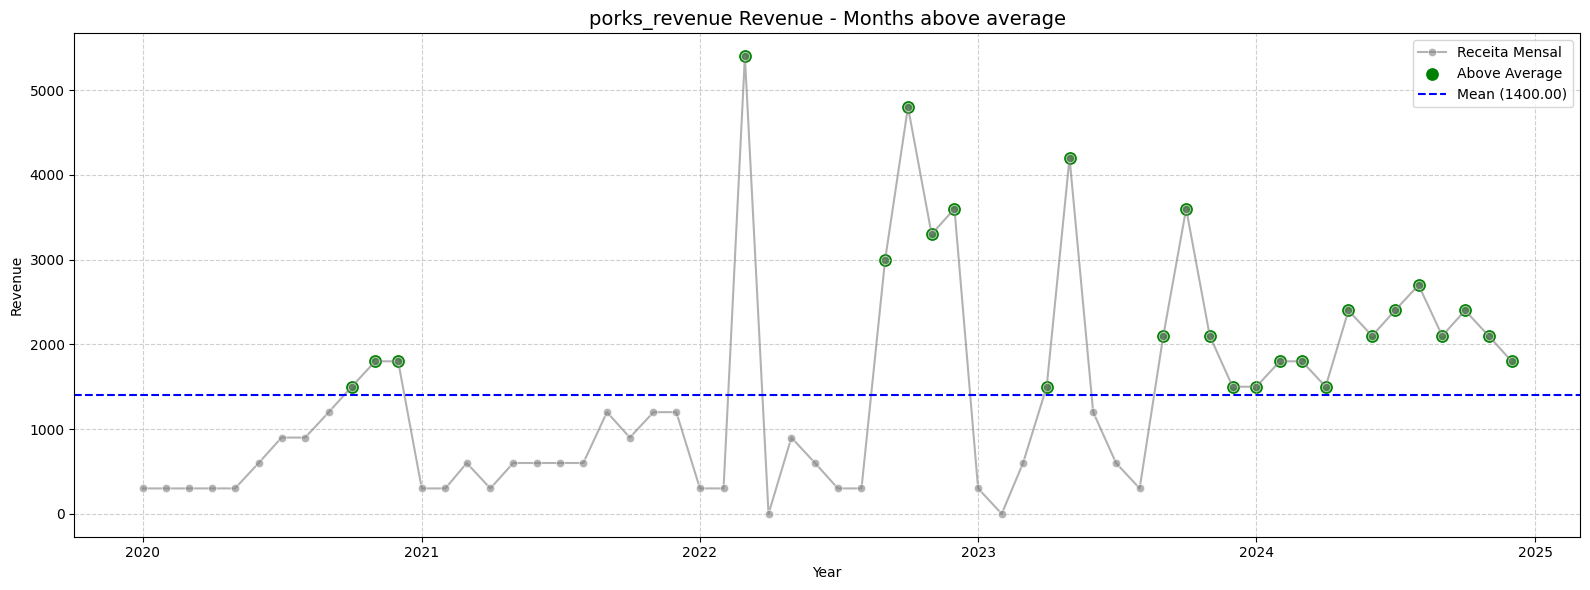

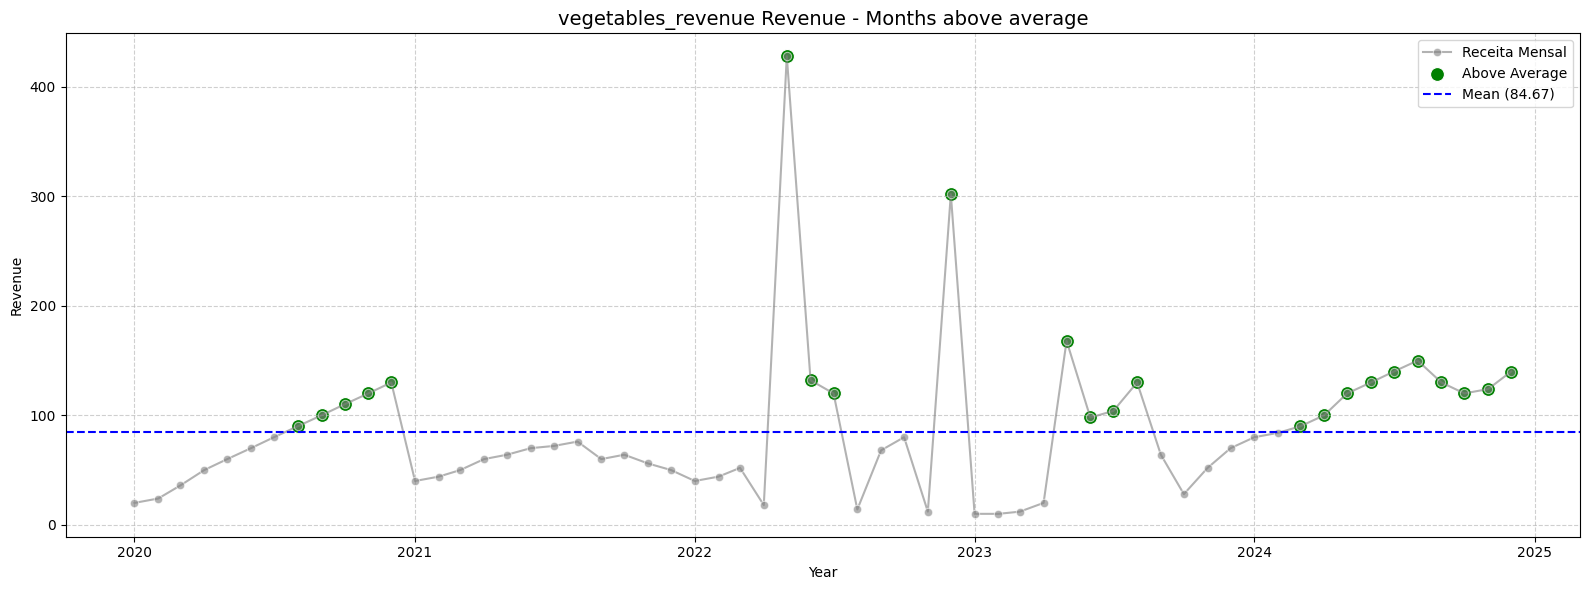

In [ ]:
products = df.columns[1:]

for product in products:
    
    mean = df[product].mean()
    
    plt.figure(figsize=(16, 6))
    
    sns.lineplot(
        data=df,
        x='date',
        y=product,
        marker='o',
        label='Receita Mensal',
        color='gray',
        alpha=0.6
    )
    above_avg = df[df[product] > mean]
    sns.scatterplot(
        data=above_avg,
        x='date',
        y=product,
        color='green',
        marker='o',
        s=100,
        label='Above Average'
    )

    plt.axhline(mean, color='blue', linestyle='-', label=f'Mean ({mean:.2f})')
        
    plt.title(f'{product} Revenue - Months above average', fontsize=14)
    plt.xlabel('Year')
    plt.ylabel('Revenue')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    
    plt.show()